In [ ]:
from rich import print as rprint

### Basic LLM call


#### Sync


In [ ]:
from tinyloop.inference.litellm import LLM

llm = LLM(model="openai/gpt-3.5-turbo", temperature=0.1)

response = llm(prompt="Hello, how are you?")
rprint(response)

In [ ]:
llm.get_history()

#### Async


In [ ]:
from tinyloop.inference.litellm import LLM

llm = LLM(model="openai/gpt-3.5-turbo", temperature=0.1)

response = await llm.acall(prompt="Hello, how are you?")
rprint(response)

In [ ]:
llm.get_history()

### Structured outputs


#### Sync


In [ ]:
from tinyloop.inference.litellm import LLM
from pydantic import BaseModel

llm = LLM(
    model="openai/gpt-4.1-nano",
    temperature=0.1,
)


class CalendarEvent(BaseModel):
    name: str
    date: str
    participants: list[str]


class EventsList(BaseModel):
    events: list[CalendarEvent]


response = llm(
    prompt="List 5 important events in the XIX century", response_format=EventsList
)
rprint(response)

#### Async


In [ ]:
from tinyloop.inference.litellm import LLM

llm = LLM(model="openai/gpt-3.5-turbo", temperature=0.1)

response = await llm.acall(prompt="Hello, how are you?")
rprint(response)

In [ ]:
from tinyloop.inference.litellm import LLM
from pydantic import BaseModel

llm = LLM(
    model="anthropic/claude-3-5-haiku-20241022",
    temperature=0.1,
)


class CalendarEvent(BaseModel):
    name: str
    date: str
    participants: list[str]


class EventsList(BaseModel):
    events: list[CalendarEvent]


response = await llm.acall(
    prompt="List 5 important events in the XIX century", response_format=EventsList
)
rprint(response)

In [ ]:
from tinyloop.inference.litellm import LLM
from pydantic import BaseModel

llm = LLM(
    model="openrouter/google/gemini-2.5-flash",
    temperature=0.1,
)


class CalendarEvent(BaseModel):
    name: str
    date: str
    participants: list[str]


class EventsList(BaseModel):
    events: list[CalendarEvent]


response = await llm.acall(
    prompt="List 5 important events in the XIX century", response_format=EventsList
)
rprint(response)

### Vision


#### Sync


##### From PIL


In [ ]:
from tinyloop.inference.litellm import LLM
from PIL import Image as PILImage
from tinyloop.functionality.vision import Image

llm = LLM(
    model="openai/gpt-4.1-nano",
    temperature=0.1,
)


# Read a local JPG file as PIL image
pil_image = PILImage.open("sutton.jpg")

# Create tinyloop Image from PIL image
image = Image.from_PIL(pil_image)


response = llm(prompt="Describe the image", images=[image])

rprint(response)

##### From File


In [ ]:
from tinyloop.inference.litellm import LLM
from PIL import Image as PILImage
from tinyloop.functionality.vision import Image

llm = LLM(
    model="anthropic/claude-3-7-sonnet-20250219",
    temperature=0.1,
)

# Create tinyloop Image from PIL image
image = Image.from_file("sutton.jpg")


response = llm(prompt="Describe the image", images=[image])

rprint(response)

##### From URL


In [ ]:
from tinyloop.inference.litellm import LLM
from PIL import Image as PILImage
from tinyloop.functionality.vision import Image
import litellm

llm = LLM(
    model="openrouter/google/gemini-2.5-pro",
    temperature=0.1,
)
litellm._turn_on_debug()

# Create tinyloop Image from PIL image
url = "https://images.ctfassets.net/cnu0m8re1exe/2xdqQSvfebktASbHvILYH5/fcc91130ad1ff329765595b669549d8d/Meet-Jumping-Spider-Adorable-Arachnid.jpg?fm=jpg&fl=progressive&w=660&h=433&fit=fill"
image = Image.from_url(url)


response = llm(prompt="Describe the image", images=[image])

rprint(response)

#### Async


##### From PIL


09:49:36 - LiteLLM:DEBUG: utils.py:349 - 

09:49:36 - LiteLLM:DEBUG: utils.py:349 - Request to litellm:
09:49:36 - LiteLLM:DEBUG: utils.py:349 - litellm.acompletion(model='openai/gpt-4.1-nano', messages=[{'role': 'user', 'content': [{'type': 'text', 'text': 'Describe the image'}, {'type': 'image_url', 'image_url': {'url': '', 'format': 'image/jpeg'}}]}], temperature=0.1, caching=False, stream=False)
09:49:36 - LiteLLM:DEBUG: utils.py:349 - 

09:49:36 - LiteLLM:DEBUG: litellm_logging.py:474 - self.optional_params: {}
09:49:36 - LiteLLM:DEBUG: utils.py:349 - ASYNC kwargs[caching]: False; litellm.cache: None; kwargs.get('cache'): None
09:49:36 - LiteLLM:DEBUG: caching_handler.py:234 - CACHE RESULT: None
09:49:36 - LiteLLM:INFO: utils.py:3309 - 
LiteLLM completion() model= gpt-4.1-nano; provider = openai
09:49:36 - LiteLLM:DEBUG: utils.py:3312 - 
LiteLLM: Params passed to completion() {'model': 'gpt-4.1-nano', 'functions': None, 'function_call': None, 'temperature': 0.1, 'top_p': None, 'n'
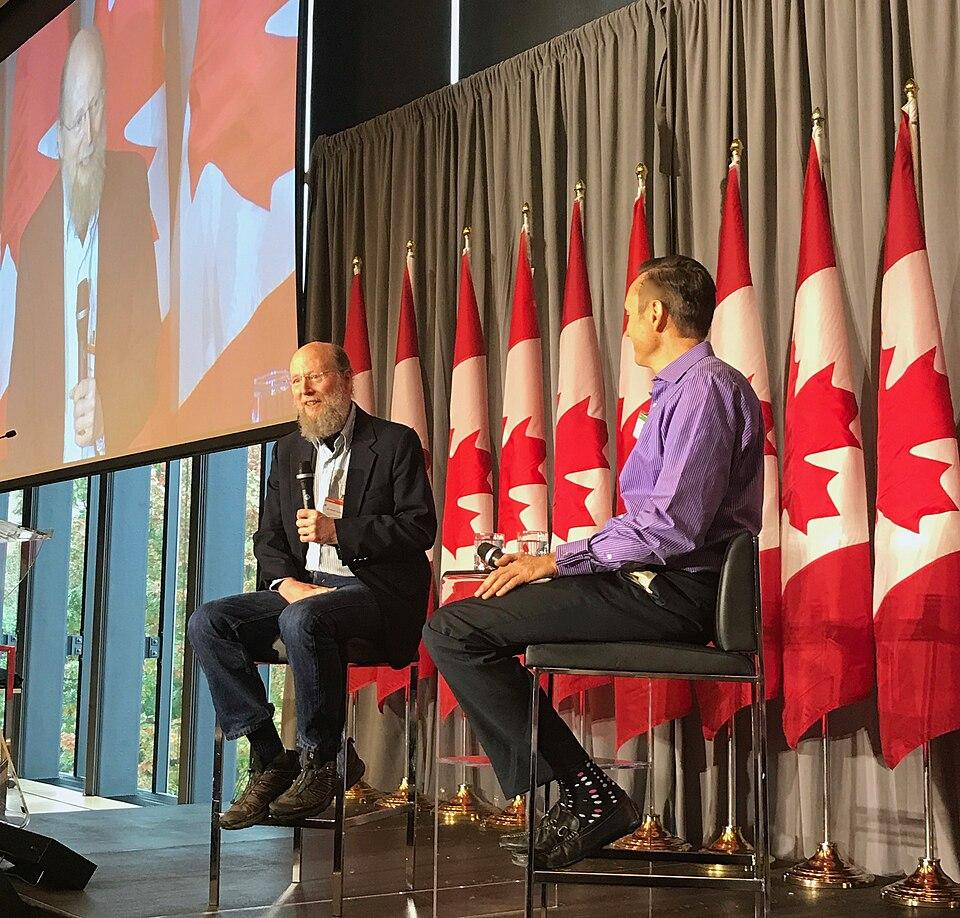
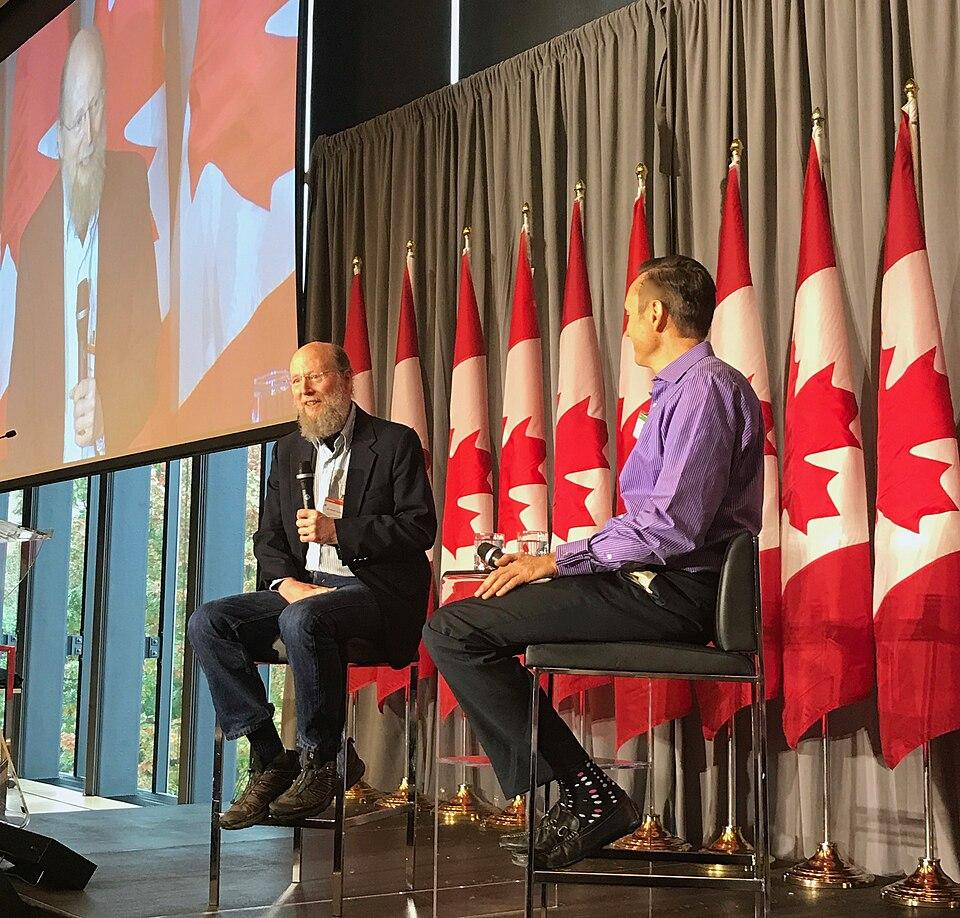
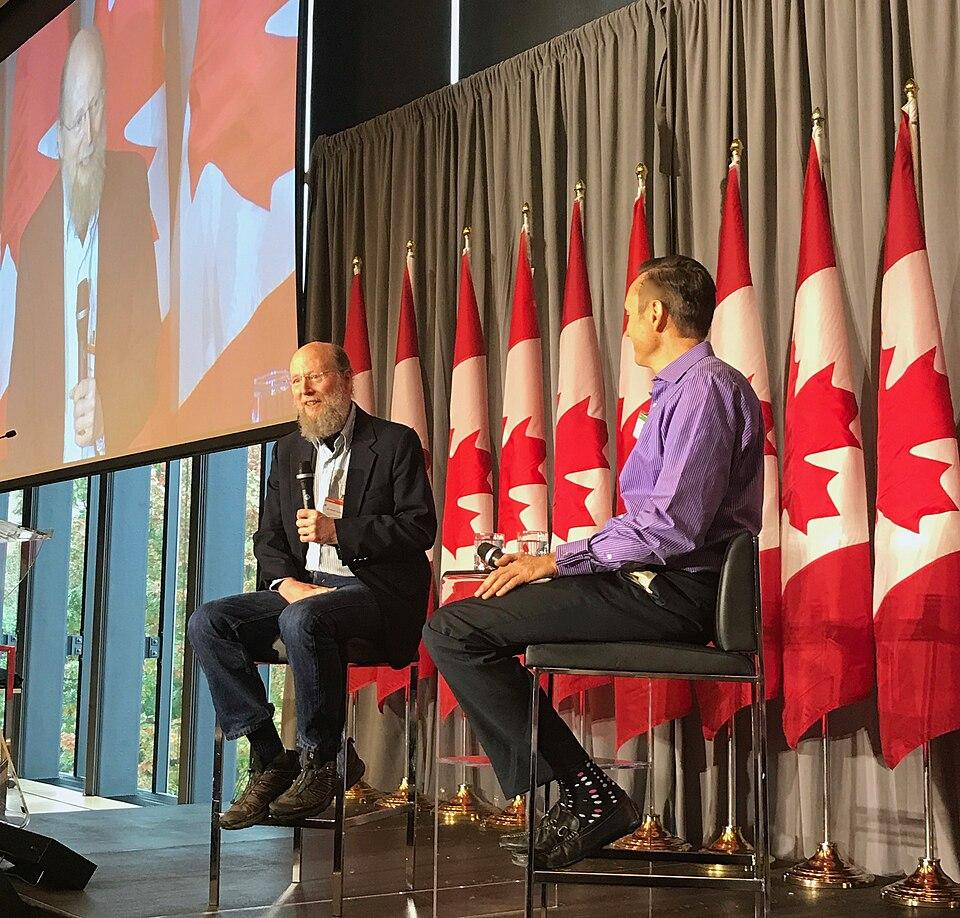

LLMResponse(
    response='The image shows two men seated on a stage, engaged in a discussion or interview. One man, with a 
beard and glasses, is holding a microphone and appears to be speaking. The other man, dressed in a purple shirt, is
sitting attentively, facing the speaker. Behind them, there are multiple Canadian flags arranged in a row, and a 
large screen displays a close-up of the man with the microphone. The setting appears to be a formal event or 
conference, with a backdrop of curtains and a window showing greenery outside.',
    raw_response=ModelResponse(
        id='chatcmpl-C7OJGKceKrBfQQMpwwfLEmxG3d9Oj',
        created=1755877778,
        model='gpt-4.1-nano-2025-04-14',
        object='chat.completion',
        system_fingerprint='fp_c4c155951e',
        choices=[
            Choices(
                finish_reason='stop',
                index=0,
                message=Message(
                    content='The image shows two men seated on a stage, engaged in a discussion or interview. One 
man, with a beard and glasses, is holding a microphone and appears to be speaking. The other man, dressed in a 
purple shirt, is sitting attentively, facing the speaker. Behind them, there are multiple Canadian flags arranged 
in a row, and a large screen displays a close-up of the man with the microphone. The setting appears to be a formal
event or conference, with a backdrop of curtains and a window showing greenery outside.',
                    role='assistant',
                    tool_calls=None,
                    function_call=None,
                    provider_specific_fields={'refusal': None},
                    annotations=[]
                ),
                provider_specific_fields={}
            )
        ],
        usage=Usage(
            completion_tokens=106,
            prompt_tokens=2152,
            total_tokens=2258,
            completion_tokens_details=CompletionTokensDetailsWrapper(
                accepted_prediction_tokens=0,
                audio_tokens=0,
                reasoning_tokens=0,
                rejected_prediction_tokens=0,
                text_tokens=None
            ),
            prompt_tokens_details=PromptTokensDetailsWrapper(
                audio_tokens=0,
                cached_tokens=0,
                text_tokens=None,
                image_tokens=None
            )
        ),
        service_tier='default'
    ),
    cost=0.0002576,
    hidden_fields={
        'custom_llm_provider': 'openai',
        'region_name': None,
        'headers': {
            'date': 'Fri, 22 Aug 2025 15:49:39 GMT',
            'content-type': 'application/json',
            'transfer-encoding': 'chunked',
            'connection': 'keep-alive',
            'access-control-expose-headers': 'X-Request-ID',
            'openai-organization': 'lfm-l6lfkw',
            'openai-processing-ms': '1340',
            'openai-project': 'proj_7yoQfLIduKm5aSVPH3fNz0C9',
            'openai-version': '2020-10-01',
            'x-envoy-upstream-service-time': '1409',
            'x-ratelimit-limit-input-images': '50000',
            'x-ratelimit-limit-requests': '10000',
            'x-ratelimit-limit-tokens': '10000000',
            'x-ratelimit-remaining-input-images': '49999',
            'x-ratelimit-remaining-requests': '9999',
            'x-ratelimit-remaining-tokens': '9999227',
            'x-ratelimit-reset-input-images': '1ms',
            'x-ratelimit-reset-requests': '6ms',
            'x-ratelimit-reset-tokens': '4ms',
            'x-request-id': 'req_e1f5bac8ca1f470ea6a23dd7040b34cb',
            'cf-cache-status': 'DYNAMIC',
            'strict-transport-security': 'max-age=31536000; includeSubDomains; preload',
            'x-content-type-options': 'nosniff',
            'server': 'cloudflare',
            'cf-ray': '9733856abfabbec5-YYC',
            'content-encoding': 'gzip',
            'alt-svc': 'h3=":443"; ma=86400'
        },
        'additional_headers': {
            'x-rate

09:49:39 - LiteLLM:DEBUG: utils.py:349 - Async Wrapper: Completed Call, calling async_success_handler: <bound method Logging.async_success_handler of <litellm.litellm_core_utils.litellm_logging.Logging object at 0x12c59b910>>
09:49:39 - LiteLLM:DEBUG: litellm_logging.py:2832 - Filtered callbacks: []


09:49:39 - LiteLLM:DEBUG: utils.py:349 - Logging Details LiteLLM-Async Success Call, cache_hit=None
09:49:39 - LiteLLM Proxy:DEBUG: cold_storage_handler.py:78 - Unable to import proxy_server for cold storage logging: Missing dependency No module named 'backoff'. Run `pip install 'litellm[proxy]'`
09:49:39 - LiteLLM:DEBUG: utils.py:4682 - checking potential_model_names in litellm.model_cost: {'split_model': 'gpt-4.1-nano-2025-04-14', 'combined_model_name': 'openai/gpt-4.1-nano-2025-04-14', 'stripped_model_name': 'gpt-4.1-nano-2025-04-14', 'combined_stripped_model_name': 'openai/gpt-4.1-nano-2025-04-14', 'custom_llm_provider': 'openai'}
09:49:39 - LiteLLM:DEBUG: utils.py:4987 - model_info: {'key': 'gpt-4.1-nano-2025-04-14', 'max_tokens': 32768, 'max_input_tokens': 1047576, 'max_output_tokens': 32768, 'input_cost_per_token': 1e-07, 'cache_creation_input_token_cost': None, 'cache_read_input_token_cost': 2.5e-08, 'input_cost_per_character': None, 'input_cost_per_token_above_128k_tokens': No

In [7]:
from tinyloop.inference.litellm import LLM
from PIL import Image as PILImage
from tinyloop.functionality.vision import Image

llm = LLM(
    model="openai/gpt-4.1-nano",
    temperature=0.1,
)


# Read a local JPG file as PIL image
pil_image = PILImage.open("sutton.jpg")

# Create tinyloop Image from PIL image
image = Image.from_PIL(pil_image)


response = await llm.acall(prompt="Describe the image", images=[image])

rprint(response)

##### From File


09:49:41 - LiteLLM:DEBUG: utils.py:349 - 

09:49:41 - LiteLLM:DEBUG: utils.py:349 - Request to litellm:
09:49:41 - LiteLLM:DEBUG: utils.py:349 - litellm.acompletion(model='openai/gpt-4.1-nano', messages=[{'role': 'user', 'content': [{'type': 'text', 'text': 'Describe the image'}, {'type': 'image_url', 'image_url': {'url': '', 'format': 'image/jpeg'}}]}], temperature=0.1, caching=False, stream=False)
09:49:41 - LiteLLM:DEBUG: utils.py:349 - 

09:49:41 - LiteLLM:DEBUG: litellm_logging.py:474 - self.optional_params: {}
09:49:41 - LiteLLM:DEBUG: utils.py:349 - ASYNC kwargs[caching]: False; litellm.cache: None; kwargs.get('cache'): None
09:49:41 - LiteLLM:DEBUG: caching_handler.py:234 - CACHE RESULT: None
09:49:41 - LiteLLM:INFO: utils.py:3309 - 
LiteLLM completion() model= gpt-4.1-nano; provider = openai
09:49:41 - LiteLLM:DEBUG: utils.py:3312 - 
LiteLLM: Params passed to completion() {'model': 'gpt-4.1-nano', 'functions': None, 'function_call': None, 'temperature': 0.1, 'top_p': None, 'n'
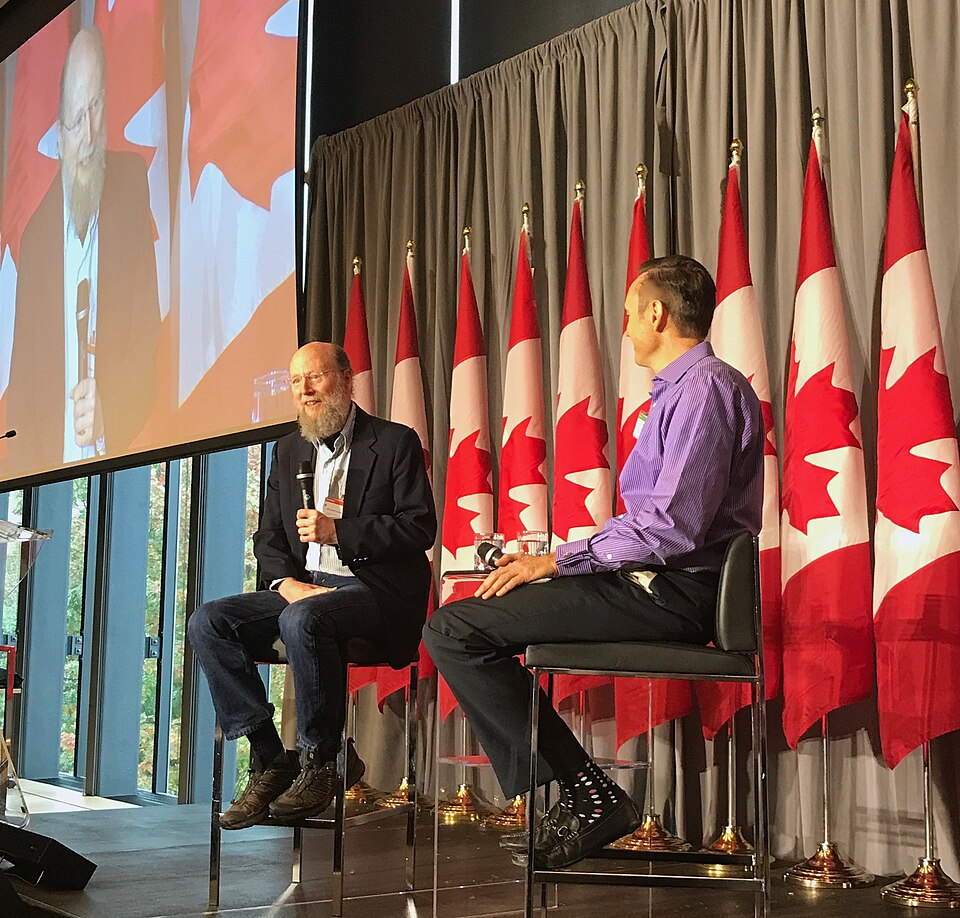
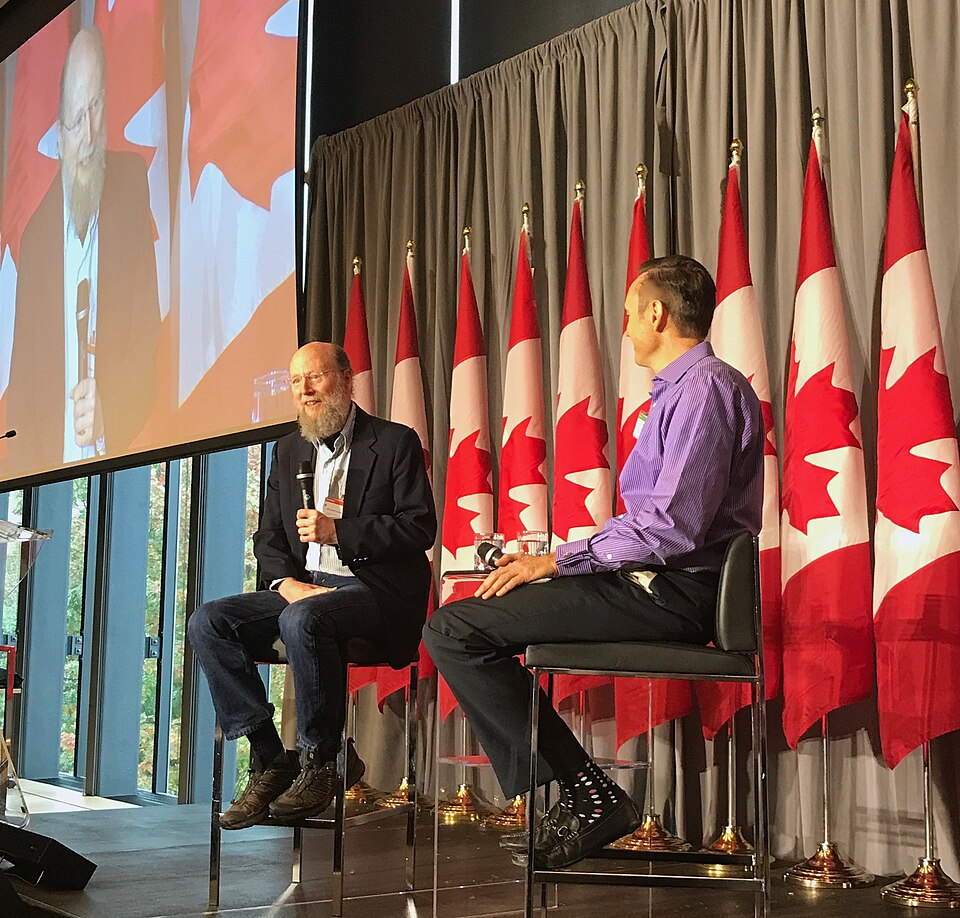
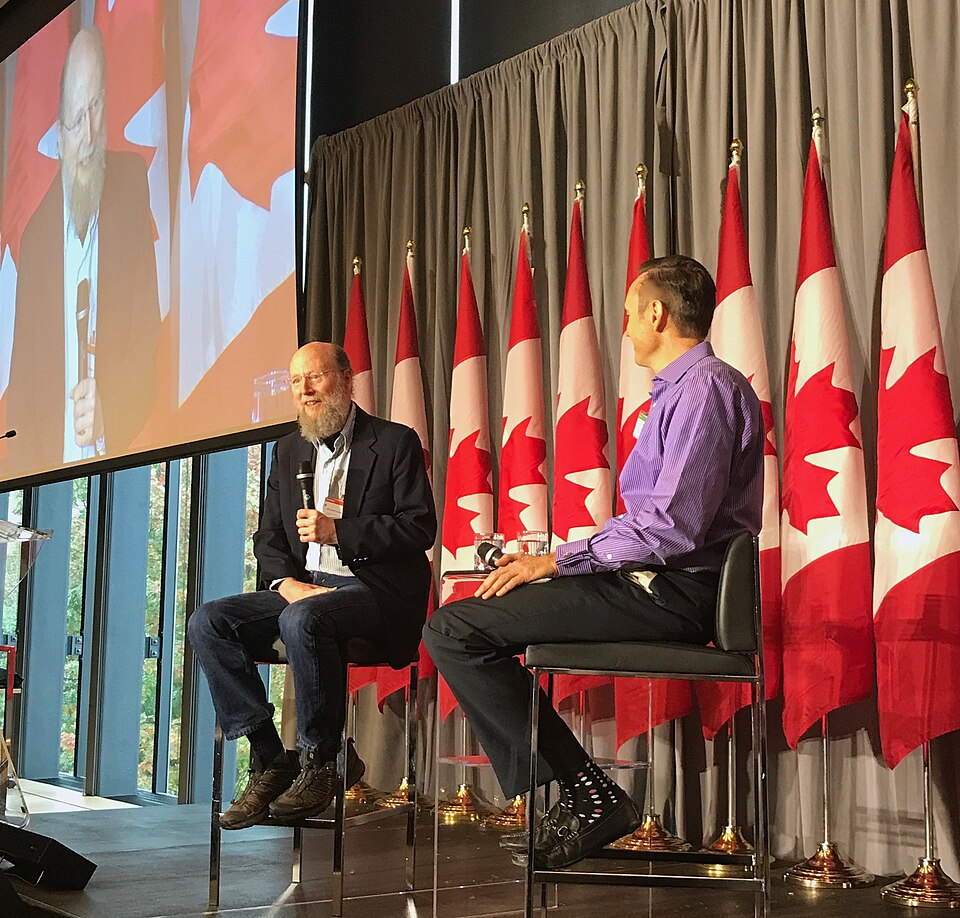

LLMResponse(
    response='The image shows two men seated on stage during a discussion or interview. One man, with a beard and 
glasses, is holding a microphone and speaking, while the other man is listening attentively. Behind them, there are
multiple Canadian flags arranged in a row, and a large screen displays a close-up of the man speaking. The setting 
appears to be a formal event or conference, with a curtain backdrop and a window with a view of trees outside. The 
overall atmosphere suggests a patriotic or national context, possibly related to Canada.',
    raw_response=ModelResponse(
        id='chatcmpl-C7OJKjl5xK2CtBsm06Fp8YosuHGen',
        created=1755877782,
        model='gpt-4.1-nano-2025-04-14',
        object='chat.completion',
        system_fingerprint='fp_c4c155951e',
        choices=[
            Choices(
                finish_reason='stop',
                index=0,
                message=Message(
                    content='The image shows two men seated on stage during a discussion or interview. One man, 
with a beard and glasses, is holding a microphone and speaking, while the other man is listening attentively. 
Behind them, there are multiple Canadian flags arranged in a row, and a large screen displays a close-up of the man
speaking. The setting appears to be a formal event or conference, with a curtain backdrop and a window with a view 
of trees outside. The overall atmosphere suggests a patriotic or national context, possibly related to Canada.',
                    role='assistant',
                    tool_calls=None,
                    function_call=None,
                    provider_specific_fields={'refusal': None},
                    annotations=[]
                ),
                provider_specific_fields={}
            )
        ],
        usage=Usage(
            completion_tokens=105,
            prompt_tokens=2152,
            total_tokens=2257,
            completion_tokens_details=CompletionTokensDetailsWrapper(
                accepted_prediction_tokens=0,
                audio_tokens=0,
                reasoning_tokens=0,
                rejected_prediction_tokens=0,
                text_tokens=None
            ),
            prompt_tokens_details=PromptTokensDetailsWrapper(
                audio_tokens=0,
                cached_tokens=0,
                text_tokens=None,
                image_tokens=None
            )
        ),
        service_tier='default'
    ),
    cost=0.0002572,
    hidden_fields={
        'custom_llm_provider': 'openai',
        'region_name': None,
        'headers': {
            'date': 'Fri, 22 Aug 2025 15:49:43 GMT',
            'content-type': 'application/json',
            'transfer-encoding': 'chunked',
            'connection': 'keep-alive',
            'access-control-expose-headers': 'X-Request-ID',
            'openai-organization': 'lfm-l6lfkw',
            'openai-processing-ms': '1147',
            'openai-project': 'proj_7yoQfLIduKm5aSVPH3fNz0C9',
            'openai-version': '2020-10-01',
            'x-envoy-upstream-service-time': '1190',
            'x-ratelimit-limit-input-images': '50000',
            'x-ratelimit-limit-requests': '10000',
            'x-ratelimit-limit-tokens': '10000000',
            'x-ratelimit-remaining-input-images': '49999',
            'x-ratelimit-remaining-requests': '9999',
            'x-ratelimit-remaining-tokens': '9999228',
            'x-ratelimit-reset-input-images': '1ms',
            'x-ratelimit-reset-requests': '6ms',
            'x-ratelimit-reset-tokens': '4ms',
            'x-request-id': 'req_0b69b3fa8bb94cc8854bedefc190f02b',
            'cf-cache-status': 'DYNAMIC',
            'strict-transport-security': 'max-age=31536000; includeSubDomains; preload',
            'x-content-type-options': 'nosniff',
            'server': 'cloudflare',
            'cf-ray': '97338584dfaabec5-YYC',
            'content-encoding': 'gzip',
            'alt-svc': 'h3=":443"; ma=86400'
        },
        '

09:49:43 - LiteLLM:DEBUG: utils.py:349 - Async Wrapper: Completed Call, calling async_success_handler: <bound method Logging.async_success_handler of <litellm.litellm_core_utils.litellm_logging.Logging object at 0x12c4a68d0>>
09:49:43 - LiteLLM:DEBUG: litellm_logging.py:2832 - Filtered callbacks: []


09:49:43 - LiteLLM:DEBUG: utils.py:349 - Logging Details LiteLLM-Async Success Call, cache_hit=None
09:49:43 - LiteLLM Proxy:DEBUG: cold_storage_handler.py:78 - Unable to import proxy_server for cold storage logging: Missing dependency No module named 'backoff'. Run `pip install 'litellm[proxy]'`
09:49:43 - LiteLLM:DEBUG: utils.py:4682 - checking potential_model_names in litellm.model_cost: {'split_model': 'gpt-4.1-nano-2025-04-14', 'combined_model_name': 'openai/gpt-4.1-nano-2025-04-14', 'stripped_model_name': 'gpt-4.1-nano-2025-04-14', 'combined_stripped_model_name': 'openai/gpt-4.1-nano-2025-04-14', 'custom_llm_provider': 'openai'}
09:49:43 - LiteLLM:DEBUG: utils.py:4987 - model_info: {'key': 'gpt-4.1-nano-2025-04-14', 'max_tokens': 32768, 'max_input_tokens': 1047576, 'max_output_tokens': 32768, 'input_cost_per_token': 1e-07, 'cache_creation_input_token_cost': None, 'cache_read_input_token_cost': 2.5e-08, 'input_cost_per_character': None, 'input_cost_per_token_above_128k_tokens': No

In [8]:
from tinyloop.inference.litellm import LLM
from PIL import Image as PILImage
from tinyloop.functionality.vision import Image

llm = LLM(
    model="openai/gpt-4.1-nano",
    temperature=0.1,
)

# Create tinyloop Image from PIL image
image = Image.from_file("sutton.jpg")


response = await llm.acall(prompt="Describe the image", images=[image])

rprint(response)

##### From URL


In [9]:
from tinyloop.inference.litellm import LLM
from PIL import Image as PILImage
from tinyloop.functionality.vision import Image

llm = LLM(
    model="anthropic/claude-3-7-sonnet-20250219",
    temperature=0.1,
)

# Create tinyloop Image from PIL image
url = "https://images.ctfassets.net/cnu0m8re1exe/2xdqQSvfebktASbHvILYH5/fcc91130ad1ff329765595b669549d8d/Meet-Jumping-Spider-Adorable-Arachnid.jpg?fm=jpg&fl=progressive&w=660&h=433&fit=fill"
image = Image.from_url(url)


response = await llm.acall(prompt="Describe the image", images=[image])

rprint(response)

09:49:52 - LiteLLM:DEBUG: utils.py:349 - 

09:49:52 - LiteLLM:DEBUG: utils.py:349 - Request to litellm:
09:49:52 - LiteLLM:DEBUG: utils.py:349 - litellm.acompletion(model='anthropic/claude-3-7-sonnet-20250219', messages=[{'role': 'user', 'content': [{'type': 'text', 'text': 'Describe the image'}, {'type': 'image_url', 'image_url': {'url': 'https://images.ctfassets.net/cnu0m8re1exe/2xdqQSvfebktASbHvILYH5/fcc91130ad1ff329765595b669549d8d/Meet-Jumping-Spider-Adorable-Arachnid.jpg?fm=jpg&fl=progressive&w=660&h=433&fit=fill', 'format': 'image/jpeg'}}]}], temperature=0.1, caching=False, stream=False)
09:49:52 - LiteLLM:DEBUG: utils.py:349 - 

09:49:52 - LiteLLM:DEBUG: litellm_logging.py:474 - self.optional_params: {}
09:49:52 - LiteLLM:DEBUG: utils.py:349 - ASYNC kwargs[caching]: False; litellm.cache: None; kwargs.get('cache'): None
09:49:52 - LiteLLM:DEBUG: caching_handler.py:234 - CACHE RESULT: None
09:49:52 - LiteLLM:INFO: utils.py:3309 - 
LiteLLM completion() model= claude-3-7-sonnet-202

LLMResponse(
    response="This image shows an extreme close-up of a jumping spider (likely from the Salticidae family) resting 
on what appears to be a yellow-green surface. The spider has a fuzzy, hairy body with a bluish-gray coloration and 
distinctive large front-facing eyes that give it an alert, almost curious appearance. Jumping spiders are known for
these prominent eyes that provide them with excellent vision for hunting. The spider's legs are visible extending 
from its body, and you can see the fine hairs covering its entire form. The background is a bright lime green 
color, creating a striking contrast with the spider's darker coloration. This is a remarkable macro photograph that
captures the intricate details of this small arachnid.",
    raw_response=ModelResponse(
        id='chatcmpl-8a67b3c0-896c-4611-baf9-cb5cb71ca238',
        created=1755877797,
        model='claude-3-7-sonnet-20250219',
        object='chat.completion',
        system_fingerprint=None,
        choices=[
            Choices(
                finish_reason='stop',
                index=0,
                message=Message(
                    content="This image shows an extreme close-up of a jumping spider (likely from the Salticidae 
family) resting on what appears to be a yellow-green surface. The spider has a fuzzy, hairy body with a bluish-gray
coloration and distinctive large front-facing eyes that give it an alert, almost curious appearance. Jumping 
spiders are known for these prominent eyes that provide them with excellent vision for hunting. The spider's legs 
are visible extending from its body, and you can see the fine hairs covering its entire form. The background is a 
bright lime green color, creating a striking contrast with the spider's darker coloration. This is a remarkable 
macro photograph that captures the intricate details of this small arachnid.",
                    role='assistant',
                    tool_calls=None,
                    function_call=None,
                    provider_specific_fields={'citations': None, 'thinking_blocks': None}
                )
            )
        ],
        usage=Usage(
            completion_tokens=157,
            prompt_tokens=398,
            total_tokens=555,
            completion_tokens_details=None,
            prompt_tokens_details=PromptTokensDetailsWrapper(
                audio_tokens=None,
                cached_tokens=0,
                text_tokens=None,
                image_tokens=None
            ),
            cache_creation_input_tokens=0,
            cache_read_input_tokens=0
        )
    ),
    cost=0.003549,
    hidden_fields={
        'additional_headers': {
            'x-ratelimit-limit-requests': '4000',
            'x-ratelimit-remaining-requests': '3999',
            'x-ratelimit-limit-tokens': '280000',
            'x-ratelimit-remaining-tokens': '280000',
            'llm_provider-date': 'Fri, 22 Aug 2025 15:49:57 GMT',
            'llm_provider-content-type': 'application/json',
            'llm_provider-transfer-encoding': 'chunked',
            'llm_provider-connection': 'keep-alive',
            'llm_provider-content-encoding': 'gzip',
            'llm_provider-anthropic-ratelimit-input-tokens-limit': '200000',
            'llm_provider-anthropic-ratelimit-input-tokens-remaining': '200000',
            'llm_provider-anthropic-ratelimit-input-tokens-reset': '2025-08-22T15:49:54Z',
            'llm_provider-anthropic-ratelimit-output-tokens-limit': '80000',
            'llm_provider-anthropic-ratelimit-output-tokens-remaining': '80000',
            'llm_provider-anthropic-ratelimit-output-tokens-reset': '2025-08-22T15:49:57Z',
            'llm_provider-anthropic-ratelimit-requests-limit': '4000',
            'llm_provider-anthropic-ratelimit-requests-remaining': '3999',
            'llm_provider-anthropic-ratelimit-requests-reset': '2025-08-22T15:49:53Z',
            'llm_provider-anthropic-ratelimit-tokens-limit': '280000',
            'llm_pr

09:49:57 - LiteLLM:DEBUG: utils.py:349 - Async Wrapper: Completed Call, calling async_success_handler: <bound method Logging.async_success_handler of <litellm.litellm_core_utils.litellm_logging.Logging object at 0x12cf1b910>>
09:49:57 - LiteLLM:DEBUG: litellm_logging.py:2832 - Filtered callbacks: []


09:49:57 - LiteLLM:DEBUG: utils.py:349 - Logging Details LiteLLM-Async Success Call, cache_hit=None
09:49:57 - LiteLLM Proxy:DEBUG: cold_storage_handler.py:78 - Unable to import proxy_server for cold storage logging: Missing dependency No module named 'backoff'. Run `pip install 'litellm[proxy]'`
09:49:57 - LiteLLM:DEBUG: utils.py:4682 - checking potential_model_names in litellm.model_cost: {'split_model': 'claude-3-7-sonnet-20250219', 'combined_model_name': 'anthropic/claude-3-7-sonnet-20250219', 'stripped_model_name': 'claude-3-7-sonnet-20250219', 'combined_stripped_model_name': 'anthropic/claude-3-7-sonnet-20250219', 'custom_llm_provider': 'anthropic'}
09:49:57 - LiteLLM:DEBUG: utils.py:4987 - model_info: {'key': 'claude-3-7-sonnet-20250219', 'max_tokens': 128000, 'max_input_tokens': 200000, 'max_output_tokens': 128000, 'input_cost_per_token': 3e-06, 'cache_creation_input_token_cost': 3.75e-06, 'cache_read_input_token_cost': 3e-07, 'input_cost_per_character': None, 'input_cost_per_t